In [24]:
import cv2 as cv
import numpy as np

In [ ]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

In [ ]:
flags = [i for i in dir(cv) if i.startswith('IMREAD_')]
print( flags )

In [2]:
from matplotlib import pyplot as plt

In [3]:
# function to show images
def show_img(image, string, size = 4, grid='',which='major',alpha=0.9,cmap=None):
    plt.figure(figsize=(size,size))
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB),cmap=cmap)
    plt.title(string)
    plt.minorticks_on()
    if grid == 'grid':
        plt.grid(which=which,alpha=alpha)
    plt.show()

In [4]:
karga = cv.imread('karga_1.png')

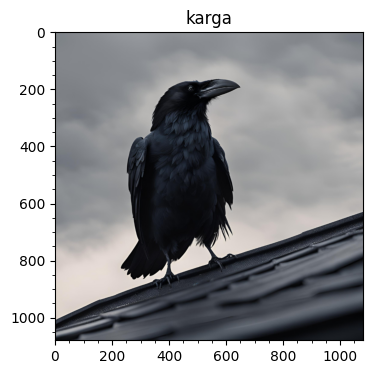

In [5]:
show_img(karga, "karga")

In [6]:
#Changing the color space
hsv = cv.cvtColor(karga, cv.COLOR_BGR2HSV)

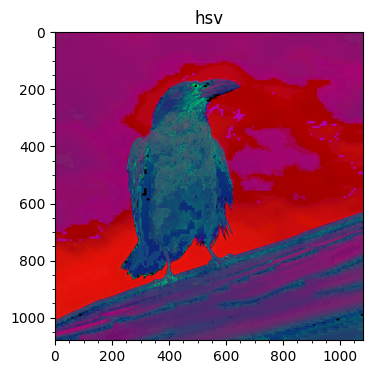

In [7]:
show_img(hsv,'hsv')

In [8]:
res = cv.resize(karga,None,fx=4,fy=4)

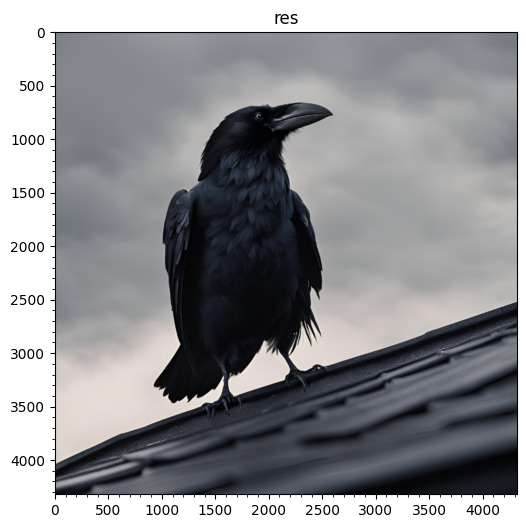

In [12]:
show_img(res,"res",6)

## Geometric Transformation of Images

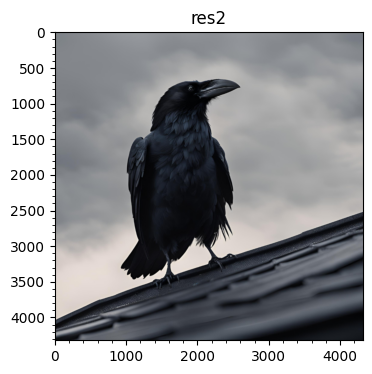

In [13]:
res2 = cv.resize(karga,None,fx=4,fy=4,interpolation = cv.INTER_LINEAR)
show_img(res2,"res2")

In [16]:
# Function for zooming
def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv.INTER_LINEAR)
    
    return result

In [17]:
a = zoom_at(karga,9.1,0,(450,140))

In [18]:
show_img(a,"a",8)

In [19]:
a = zoom_at(karga,1,0,(200,500))
show_img(a,"a")

In [20]:
football = cv.imread('football.jpg',cv.IMREAD_GRAYSCALE)

In [21]:
show_img(football,'football')

In [22]:
rows,cols=football.shape

In [25]:
#shifting
M = np.float32([[1,0,50],[0,1,50]])
shifted = cv.warpAffine(football,M,(cols,rows))
show_img(shifted,'shifted')

In [26]:
#rotation
rotation = cv.getRotationMatrix2D((cols/2,rows/2),45,1)
rotation

array([[  0.70710678,   0.70710678, -36.33335086],
       [ -0.70710678,   0.70710678, 313.2835316 ]])

In [27]:
rotated = cv.warpAffine(football,rotation,(cols,rows))

In [28]:
show_img(rotated,'rotated')

In [29]:
show_img(football,'football')

In [30]:
football.shape

(401, 720)

In [31]:
karga.shape

(1080, 1080, 3)

In [32]:
ch=karga.shape[2]

In [33]:
show_img(karga,'karga',4,'grid','major')

In [34]:
#Affine Transformation
pts1 = np.float32([[200,180],[650,180],[200,900]])
pts2 = np.float32([[20,300],[650,180],[700,800]])
affine = cv.getAffineTransform(pts1,pts2)
affine

array([[ 1.40000000e+00,  9.44444444e-01, -4.30000000e+02],
       [-2.66666667e-01,  6.94444444e-01,  2.28333333e+02]])

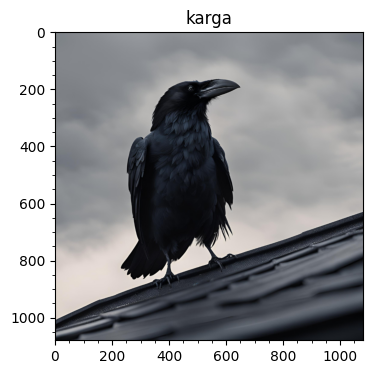

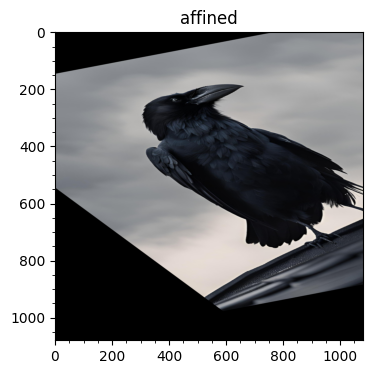

In [35]:
affined = cv.warpAffine(karga,affine,(karga.shape[1],karga.shape[0]))
show_img(karga,'karga')
show_img(affined,'affined')

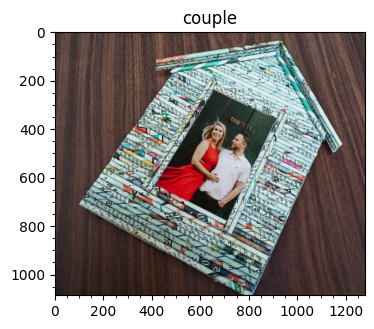

In [36]:
# Perspective Transformation
couple = cv.imread('couple.jpg')
show_img(couple,'couple')

In [37]:
show_img(couple,'couple',7,'grid','both')

In [38]:
couple.shape

(1086, 1280, 3)

In [39]:
rows,cols,ch=couple.shape

In [40]:
pts1 = np.float32([[650,240],[920,360],[420,630],[710,780]])
pts2 = np.float32([[0,0],[1280,0],[0,1090],[1280,1090]])
perspect = cv.getPerspectiveTransform(pts1,pts2)

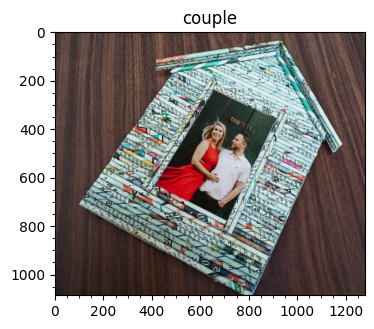

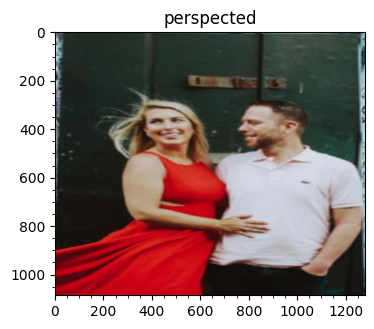

In [41]:
perspected = cv.warpPerspective(couple,perspect,(cols,rows))
show_img(couple,'couple')
show_img(perspected,'perspected')

## Image Thresholding

In [42]:
karga2 = cv.imread('karga_2.png',cv.COLOR_BGR2RGB)

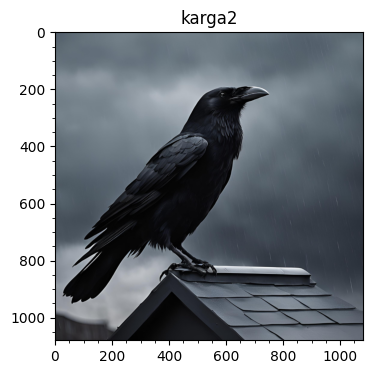

In [43]:
show_img(karga2,'karga2')

In [44]:
karga2 = cv.cvtColor(karga2, cv.COLOR_RGB2GRAY)

In [45]:
show_img(karga2,'karga2')

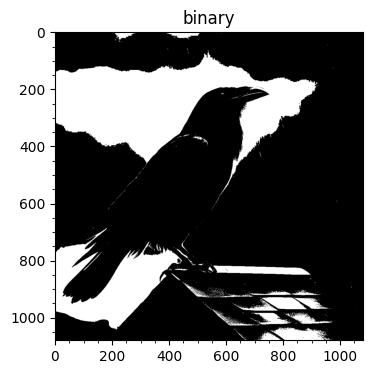

In [46]:
ret, thresh1 = cv.threshold(karga2,127,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(karga2,127,255,cv.THRESH_TRUNC)
ret, thresh3 = cv.threshold(karga2,127,255,cv.THRESH_TOZERO)
show_img(thresh1,'binary')
show_img(thresh2,'trunc')
show_img(thresh3,'tozero')

In [47]:
th2 = cv.adaptiveThreshold(thresh1,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,51,50)

In [48]:
show_img(th2,'th2')

In [49]:
# Adaptive Thresholding
th3 = cv.adaptiveThreshold(thresh1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,51,50)
show_img(th3,'th3')

In [50]:
# Otsu Thresholding
ret,th4 = cv.threshold(karga2,0,255,cv.THRESH_TRUNC+cv.THRESH_OTSU)
show_img(th4,'th4')

In [51]:
blur = cv.GaussianBlur(karga2,(5,5),0)
ret3,th5 = cv.threshold(blur,0,255,cv.THRESH_TRUNC+cv.THRESH_OTSU)
show_img(th5,'th5')

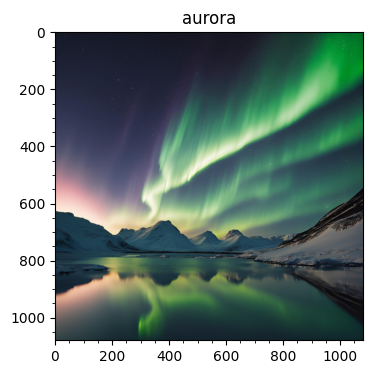

In [53]:
aurora = cv.imread('aurora.png')
show_img(aurora,'aurora')

## Smoothing Images

### Convolution

In [54]:
football = cv.imread('football.jpg')

In [56]:
show_img(football,'football')

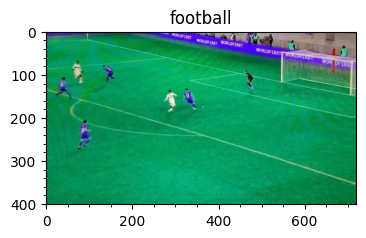

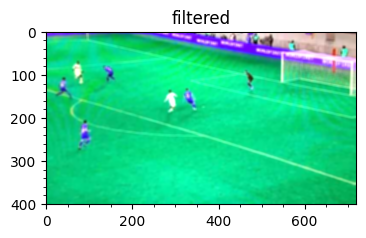

In [62]:
kernel = np.ones((6,6),np.float32)/25
football_filtered = cv.filter2D(football,-1,kernel)
show_img(football,'football')
show_img(football_filtered,'filtered')

### Image Blurring

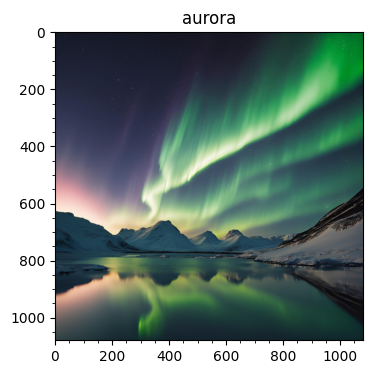

In [63]:
show_img(aurora,'aurora')

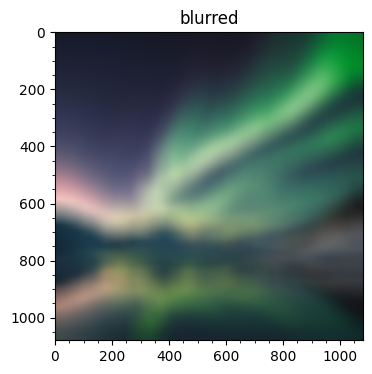

In [64]:
blur = cv.blur(aurora,(90,90))
show_img(blur,'blurred')

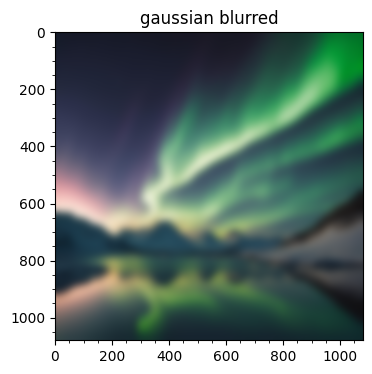

In [65]:
blur_gauss = cv.GaussianBlur(aurora,(91,91),0)
show_img(blur_gauss,'gaussian blurred')

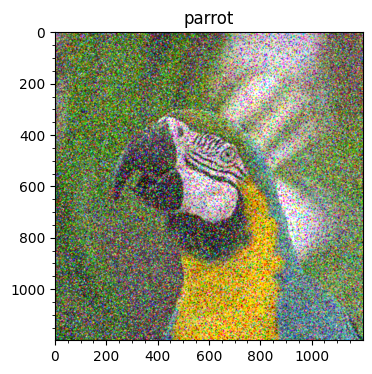

In [66]:
#Median Blurring
parrot = cv.imread('parrot_sap.png')
show_img(parrot,'parrot')

In [67]:
median = cv.medianBlur(parrot,51)
show_img(median,'median blur')

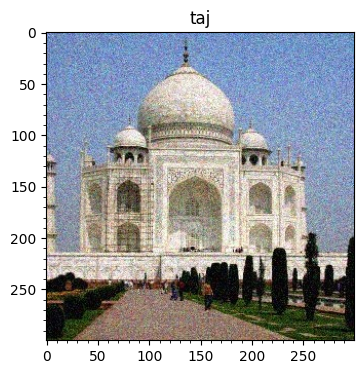

In [68]:
# Bilateral Blurring
taj = cv.imread('taj.jpg')
show_img(taj,'taj')

In [69]:
bilateral_blur = cv.bilateralFilter(taj,55,105,105)
show_img(bilateral_blur,'bilateral_blur')

## Morphological Blurring

In [70]:
church = cv.imread('stave-church.jpg')
show_img(church,'church')

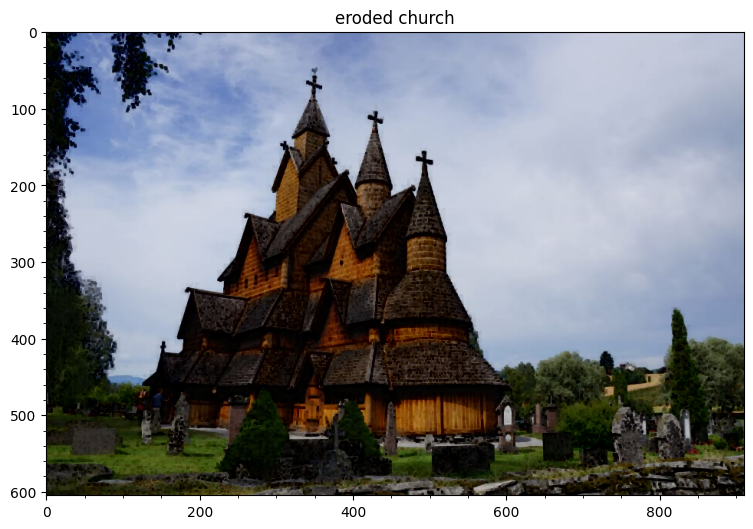

In [74]:
#erosion
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(church,kernel,iterations=1)
show_img(erosion,'eroded church',9)

In [75]:
#dilation
kernel = np.ones((2,2),np.uint8)
dilation = cv.dilate(church,kernel,iterations=1)
show_img(dilation,'dilated',9)

In [76]:
# Morphological gradient
kernel = np.ones((3,3),np.uint8)
gradient = cv.morphologyEx(church,cv.MORPH_GRADIENT,kernel)
show_img(gradient,'gradient',8)

## Canny Edge Detection

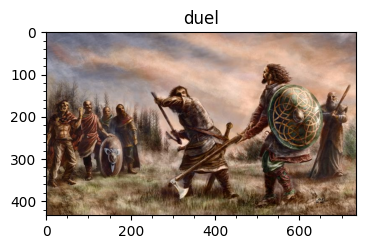

In [77]:
duel = cv.imread('duel.jpg')
show_img(duel,'duel')

In [80]:
edges = cv.Canny(duel,200,300)

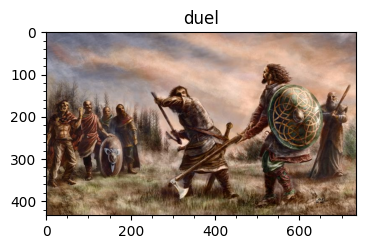

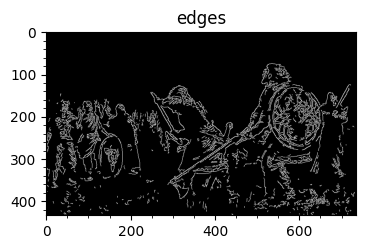

In [81]:
show_img(duel,'duel')
show_img(edges,'edges')

## Contours

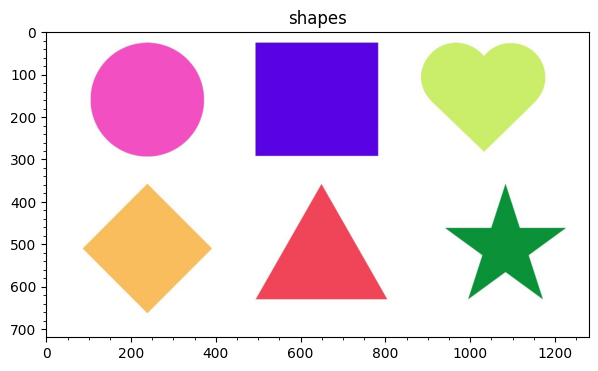

In [82]:
shapes = cv.imread('shapes.jpg')
show_img(shapes,'shapes',7)

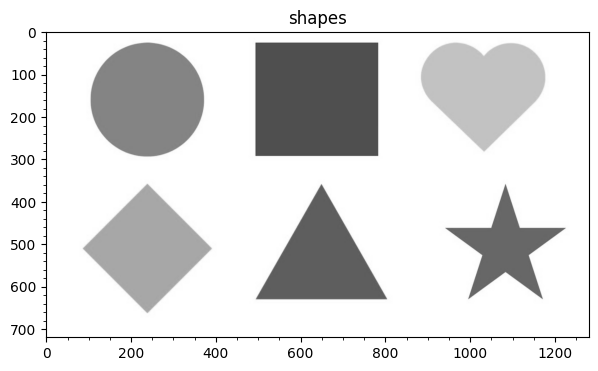

In [83]:
shapes = cv.cvtColor(shapes,cv.COLOR_RGB2GRAY)
show_img(shapes,'shapes',7)


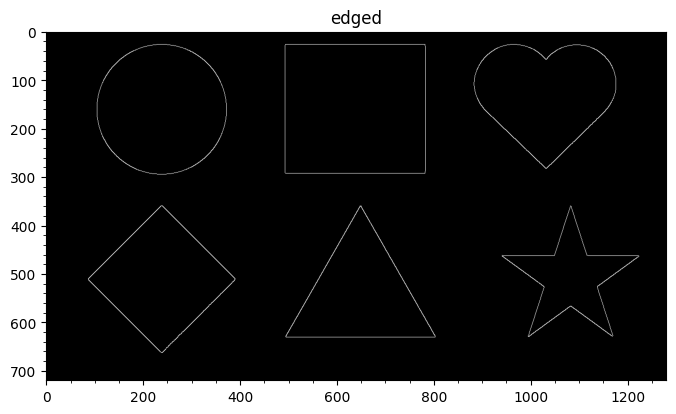

In [87]:
edged = cv.Canny(shapes,50,200)
show_img(edged,'edged',8)

In [89]:
contours,_ = cv.findContours(edged,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)

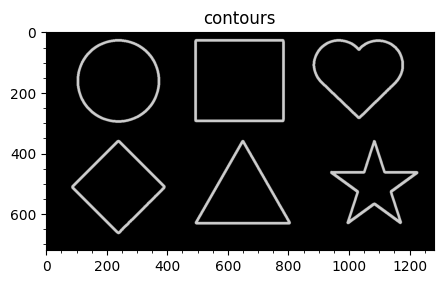

In [98]:
edged_contours = cv.drawContours(edged, contours, 2, (205,25,205), 7)
show_img(edged_contours,'contours',5)

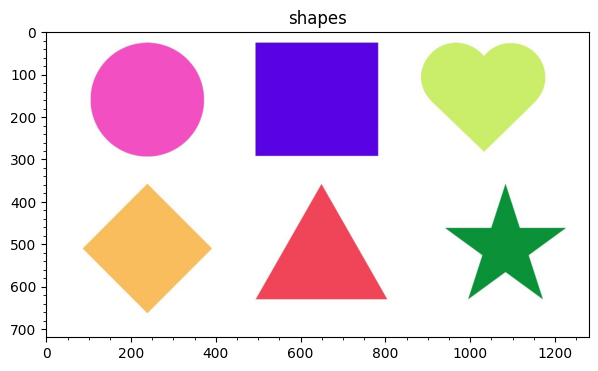

In [101]:
shapes = cv.imread('shapes.jpg')
show_img(shapes,'shapes',7)

In [109]:
shape_contours = cv.drawContours(shapes, contours, -1, (205,205,205), 12)

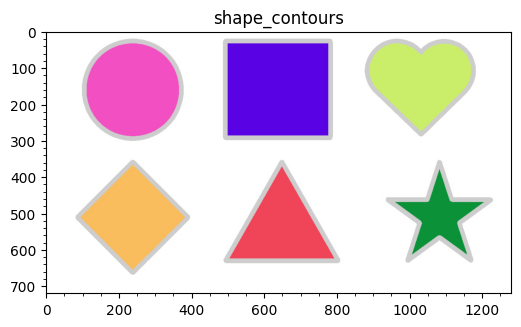

In [110]:
show_img(shape_contours,'shape_contours',6)